😊: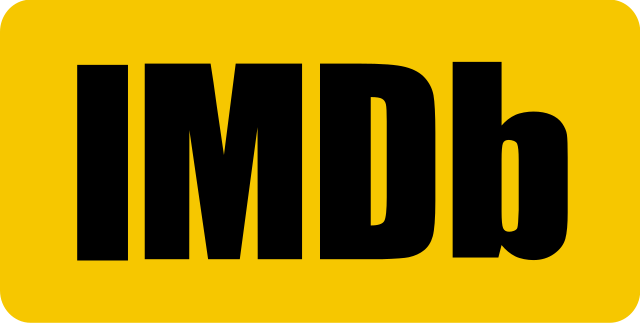

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS  
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## DataSet

In [ ]:
lines = []
review = []
sentimental  = []

with open('/content/drive/MyDrive/Colab Notebooks/IMDB Review Classification/data.txt') as f:
    lines = f.readlines()
    


In [ ]:
for x in lines:
  splitText = re.split(r'\s{3,}', x)
  review.append(splitText[0])
  sentimental.append(splitText[1])
print(len(review))
print(len(sentimental))


1000
1000


In [ ]:
df = pd.DataFrame({"Reviews":review,"Sentiment" :sentimental})
df.sample(10)

,Reviews,Sentiment
82,If there was ever a movie that needed word-of-...,1\n
490,"Totally different, with loads of understatemen...",1\n
706,The show would begin with smart ass ed comment...,0\n
44,But even the talented Carrell can't save this.,0\n
613,Go watch it!,1\n
897,"The fact is, this film is a wonderful, heartwa...",1\n
388,"Here, in The Wind and the Lion, we see a wonde...",1\n
966,"Each track commands sentiment, actually contri...",1\n
986,;) Recommend with confidence!,1\n
57,Totally believable.,1\n


In [ ]:
df['Sentiment'] = pd.to_numeric(df['Sentiment'].replace("[^0-9]", "", regex=True))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    1000 non-null   object
 1   Sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df

,Reviews,Sentiment
0,"﻿A very, very, very slow-moving, aimless movie...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


In [ ]:
df.shape

(1000, 2)

In [ ]:
# Values of Sentiment
df['Sentiment'].value_counts()

0    500
1    500
Name: Sentiment, dtype: int64

In [ ]:
# Null Values
df.isnull().sum()

Reviews      0
Sentiment    0
dtype: int64

## Data Cleaning

In [ ]:
import string
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
punct = string.punctuation
stopwords = list(STOP_WORDS)

In [ ]:
#Data Cleaning
def Data_cleaning(sentence):
  doc = nlp(sentence)

  tokens = [] # list of tokens
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)
 
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [ ]:
groupBy_0 = df[df["Sentiment"] == 0]#Negative review
groupBy_1 = df[df["Sentiment"] == 1]#Positive review

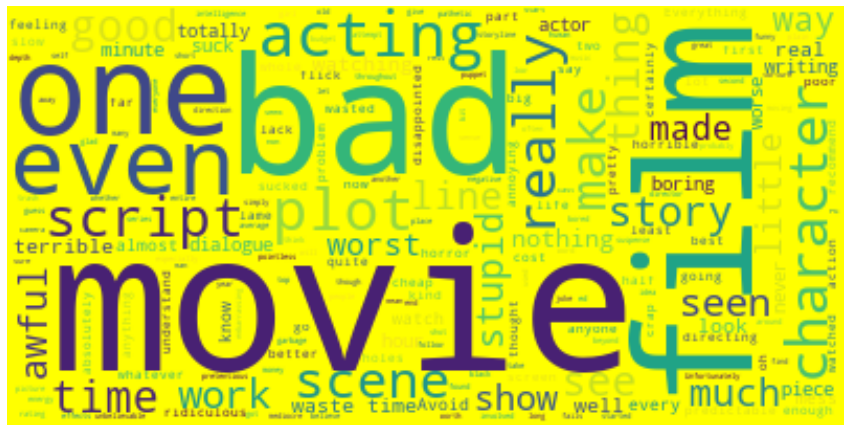

In [ ]:
text = " ".join(i for i in groupBy_0.Reviews)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="yellow").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

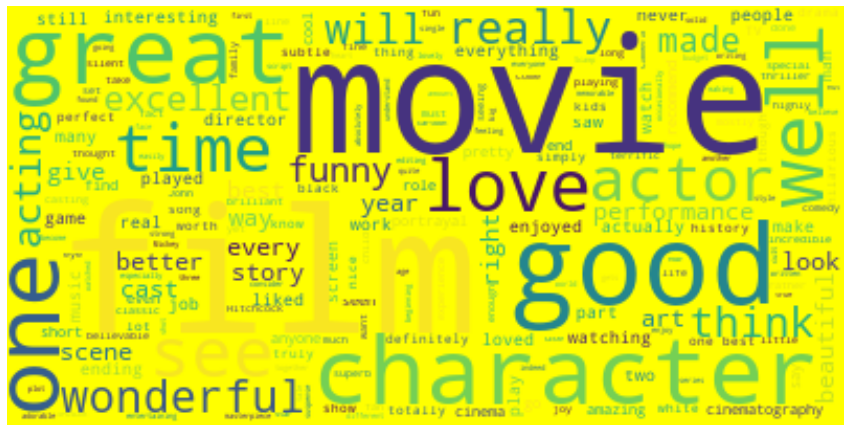

In [ ]:
text = " ".join(i for i in groupBy_1.Reviews)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="yellow").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Vectorization

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
vecto = TfidfVectorizer(tokenizer=Data_cleaning)

In [ ]:
classifier = LinearSVC()

## Model

In [ ]:
x = df['Reviews']
y = df['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape

((800,), (200,))

## Fiting X and Y train

In [ ]:
piplin = Pipeline([('vectorizer',vecto), ('classifier',classifier)])

In [ ]:
piplin.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function Data_cleaning at 0x7f443cd9ecb0>)),
                ('classifier', LinearSVC())])

## Predict

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y_predict = piplin.predict(x_test)

In [ ]:
accuracy_score(y_test, y_predict)

0.825

## Test

In [ ]:
#Test1
piplin.predict(["Good"])

array([1])

In [ ]:
#Test2
piplin.predict(["Bad"])

array([0])

In [ ]:
#Test3
piplin.predict(["I just got bored watching"])

array([0])

In [ ]:
#Test3
piplin.predict(["It was so funny"])